# What is the prevalence of different chronic conditions of interest by year?

Chronic conditions:
- Hypertension
- Diabetes (excluding gestational diabetes)
- Cancers
- Musculoskeletal
- Cardiovascular
- Hyperlipidemia
- Asthma
- COPD
- Mental Health
- Sleep Disorders (sleep apnea, insomnia, narcolepsy) - Chronic Kidney Disease.


Calculate percentage of unique HCAs with a condition of interest. Use all HCAs including those who have not generated a claim as the denominator

## Notes about the included chronic conditions

The chronic conditions we have listed above do not correspond to what we have developed now. **Do you want to update this list on this question?** I will continue to answer this question with the conditions we have discussed and incorporated in the data.

Chronic conditions listed above but not included as categories in our data:
- Hypertension
- Hyperlipidemia

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
med = pd.read_csv('../../data/reshaped_med.csv')
enroll = pd.read_csv('../../data/enroll.csv')

### Total number of HCAs each year

In [35]:
years = enroll.groupby(['Incurred Year']).agg({'Member ID Encrypted': 'count', 'Member ID Encrypted': 'nunique'})
years.reset_index(level=0, inplace=True)
years.columns = ['year', 'total']
years.loc[:, 'year'] = ['2016', '2017', '2018']
years

,year,total
0,2016,18009
1,2017,19778
2,2018,17862


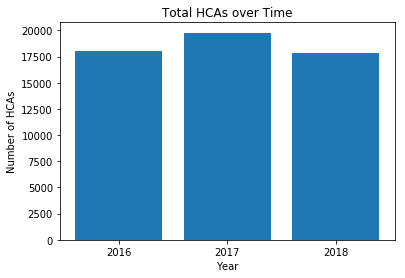

In [28]:
plt.bar(years['year'], years['total'])
plt.title('Total HCAs over Time')
plt.xlabel("Year")
plt.ylabel("Number of HCAs")
plt.show()

### Total number of claims each year

In [29]:
num_claims = med.groupby(['year']).size().reset_index(name='total')
num_claims.loc[:, 'year'] = ['2016', '2017', '2018']
num_claims

,year,total
0,2016,7213
1,2017,6449
2,2018,5601


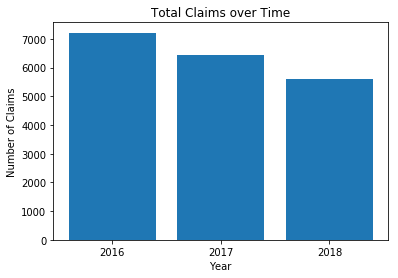

In [30]:
plt.bar(num_claims['year'], num_claims['total'])
plt.title('Total Claims over Time')
plt.xlabel("Year")
plt.ylabel("Number of Claims")
plt.show()

### Calculating percentage

In [36]:
asthma = med.groupby(['year'])['binary_asthma'].sum().reset_index(name ='asthma').asthma
bp = med.groupby(['year'])['binary_bp'].sum().reset_index(name ='bp').bp
cancer = med.groupby(['year'])['binary_cancer'].sum().reset_index(name = 'cancer').cancer
cardiovascular = med.groupby(['year'])['binary_cardiovascular'].sum().reset_index(name = 
                                                                                  'cardiovascular').cardiovascular
copd = med.groupby(['year'])['binary_copd'].sum().reset_index(name = 'copd').copd
diabetes = med.groupby(['year'])['binary_diabetes'].sum().reset_index(name = 'diabetes').diabetes
kidney = med.groupby(['year'])['binary_kidney'].sum().reset_index(name = 'kidney').kidney
obesity = med.groupby(['year'])['binary_obesity'].sum().reset_index(name = 'obesity').obesity
musculoskeletal = med.groupby(['year'])['binary_musculoskeletal'].sum().reset_index(name = 
                                                                                    'musculoskeletal').musculoskeletal
cholesterol = med.groupby(['year'])['binary_cholesterol'].sum().reset_index(name = 'cholesterol').cholesterol
mental_disorder = med.groupby(['year'])['binary_mental_disorder'].sum().reset_index(name = 
                                                                                    'mental_disorder').mental_disorder

Total claims for each chronic condition each year

In [37]:
totals_by_year = pd.concat([years, asthma, bp, cancer, cardiovascular, copd, diabetes, kidney, obesity, musculoskeletal, 
          cholesterol, mental_disorder], axis=1)
totals_by_year

,year,total,asthma,bp,cancer,cardiovascular,copd,diabetes,kidney,obesity,musculoskeletal,cholesterol,mental_disorder
0,2016,18009,356,1252,350,1099,247,928,138,481,161,822,52
1,2017,19778,365,1304,329,1139,250,961,149,516,161,811,52
2,2018,17862,319,1154,251,1027,173,844,131,548,120,652,40


Percentages for each chronic condition each year

In [38]:
percentages = totals_by_year.iloc[:,2:].div(totals_by_year['total'], axis=0) * 100
percentages.loc[:, 'year'] = ['2016', '2017', '2018']
percentages

,asthma,bp,cancer,cardiovascular,copd,diabetes,kidney,obesity,musculoskeletal,cholesterol,mental_disorder,year
0,1.976789,6.952080,1.943473,6.102504,1.371536,5.152979,0.766284,2.670887,0.893997,4.564384,0.288745,2016
1,1.845485,6.593184,1.663464,5.758924,1.264031,4.858934,0.753362,2.608959,0.814036,4.100516,0.262918,2017
2,1.785914,6.460643,1.405218,5.749636,0.968537,4.725115,0.733401,3.067966,0.671817,3.650207,0.223939,2018


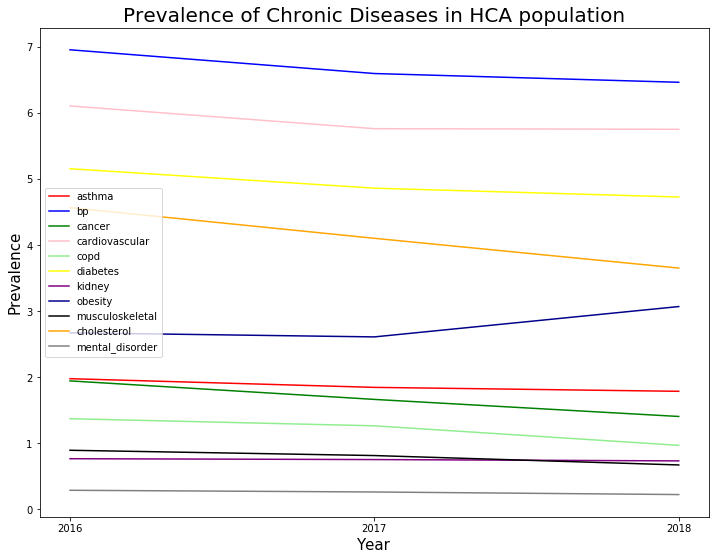

In [39]:
fig = plt.figure(figsize = (12, 9))

plt.plot(percentages['year'], percentages['asthma'], label = 'asthma', c = 'red')
plt.plot(percentages['year'], percentages['bp'], label = 'bp', c = 'blue')
plt.plot(percentages['year'], percentages['cancer'], label = 'cancer', c = 'green')
plt.plot(percentages['year'], percentages['cardiovascular'], label = 'cardiovascular', c = 'pink')
plt.plot(percentages['year'], percentages['copd'], label = 'copd', c = 'lightgreen')
plt.plot(percentages['year'], percentages['diabetes'], label = 'diabetes', c = 'yellow')
plt.plot(percentages['year'], percentages['kidney'], label = 'kidney', c = 'purple')
plt.plot(percentages['year'], percentages['obesity'], label = 'obesity', c = 'darkblue')
plt.plot(percentages['year'], percentages['musculoskeletal'], label = 'musculoskeletal', c = 'black')
plt.plot(percentages['year'], percentages['cholesterol'], label = 'cholesterol', c = 'orange')
plt.plot(percentages['year'], percentages['mental_disorder'], label = 'mental_disorder', c = 'gray')

# labels
plt.title('Prevalence of Chronic Diseases in HCA population', size = 20)
plt.xlabel("Year", size = 15)
plt.ylabel("Prevalence", size = 15)
plt.legend(['asthma', 'bp', 'cancer', 'cardiovascular', 'copd', 'diabetes', 'kidney', 'obesity', 'musculoskeletal',
           'cholesterol', 'mental_disorder'])


plt.show()

### asthma

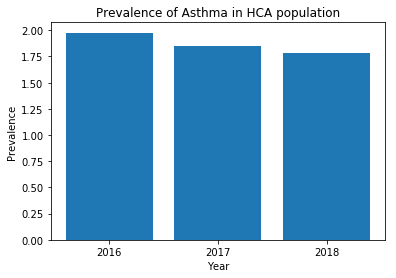

In [47]:
plt.bar(percentages['year'], percentages['asthma'], align='center', color='tab:blue')
plt.title('Prevalence of Asthma in HCA population')
plt.xlabel("Year")
plt.ylabel("Prevalence")
plt.show()

### bp

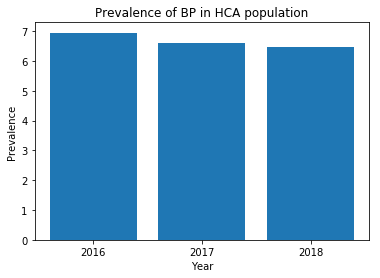

In [48]:
plt.bar(percentages['year'], percentages['bp'], align='center', color='tab:blue')
plt.title('Prevalence of BP in HCA population')
plt.xlabel("Year")
plt.ylabel("Prevalence")
plt.show()

### cancer

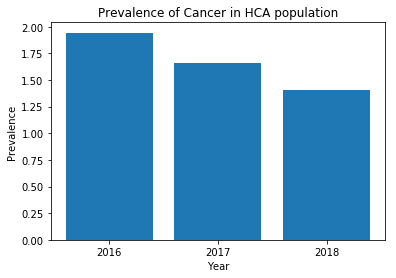

In [49]:
plt.bar(percentages['year'], percentages['cancer'], align='center', color='tab:blue')
plt.title('Prevalence of Cancer in HCA population')
plt.xlabel("Year")
plt.ylabel("Prevalence")
plt.show()

### cardiovascular

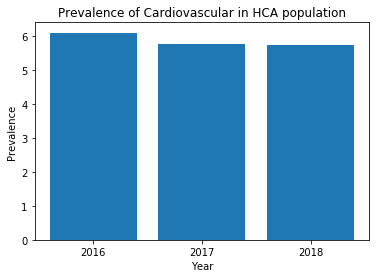

In [50]:
plt.bar(percentages['year'], percentages['cardiovascular'], align='center', color='tab:blue')
plt.title('Prevalence of Cardiovascular in HCA population')
plt.xlabel("Year")
plt.ylabel("Prevalence")
plt.show()

### copd

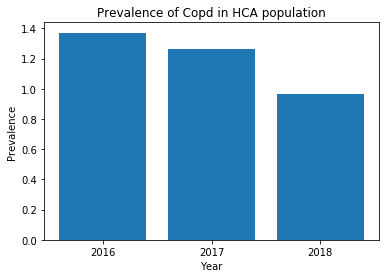

In [51]:
plt.bar(percentages['year'], percentages['copd'], align='center', color='tab:blue')
plt.title('Prevalence of Copd in HCA population')
plt.xlabel("Year")
plt.ylabel("Prevalence")
plt.show()

### diabetes

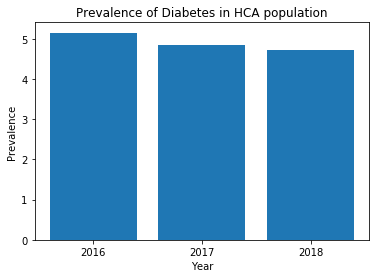

In [52]:
plt.bar(percentages['year'], percentages['diabetes'], align='center', color='tab:blue')
plt.title('Prevalence of Diabetes in HCA population')
plt.xlabel("Year")
plt.ylabel("Prevalence")
plt.show()

### kidney

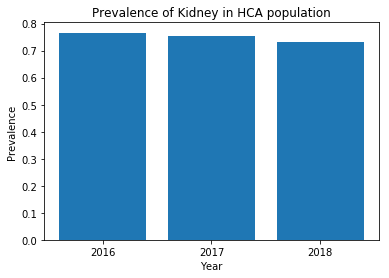

In [53]:
plt.bar(percentages['year'], percentages['kidney'], align='center', color='tab:blue')
plt.title('Prevalence of Kidney in HCA population')
plt.xlabel("Year")
plt.ylabel("Prevalence")
plt.show()

### obesity

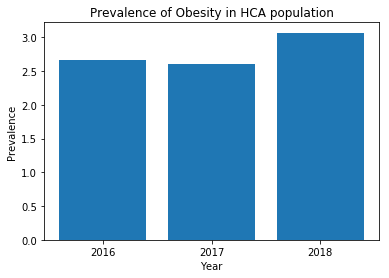

In [54]:
plt.bar(percentages['year'], percentages['obesity'], align='center', color='tab:blue')
plt.title('Prevalence of Obesity in HCA population')
plt.xlabel("Year")
plt.ylabel("Prevalence")
plt.show()

### musculoskeletal

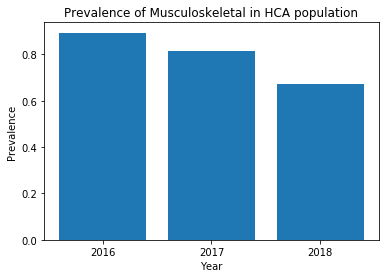

In [55]:
plt.bar(percentages['year'], percentages['musculoskeletal'], align='center', color='tab:blue')
plt.title('Prevalence of Musculoskeletal in HCA population')
plt.xlabel("Year")
plt.ylabel("Prevalence")
plt.show()

### cholesterol

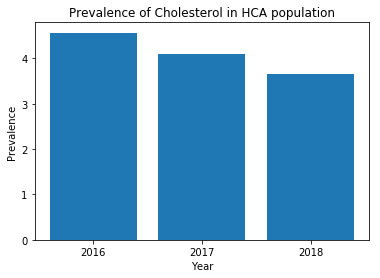

In [56]:
plt.bar(percentages['year'], percentages['cholesterol'], align='center', color='tab:blue')
plt.title('Prevalence of Cholesterol in HCA population')
plt.xlabel("Year")
plt.ylabel("Prevalence")
plt.show()

### mental_disorder

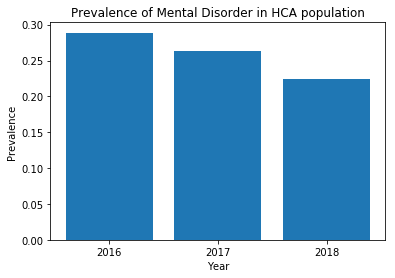

In [57]:
plt.bar(percentages['year'], percentages['mental_disorder'], align='center', color='tab:blue')
plt.title('Prevalence of Mental Disorder in HCA population')
plt.xlabel("Year")
plt.ylabel("Prevalence")
plt.show()